<a href="https://colab.research.google.com/github/SABDIKADIR/Customer-classification/blob/main/Final_Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip -o -q bank-additional.zip

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2023-08-01 15:50:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip.1’

bank-additional.zip     [ <=>                ] 434.15K  --.-KB/s    in 0.1s    

2023-08-01 15:50:29 (3.14 MB/s) - ‘bank-additional.zip.1’ saved [444572]



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [9]:
df.shape


(41188, 21)

In [10]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. `age` - client age in years (numeric)
2. `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3. `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4. `education` - client education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5. `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6. `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7. `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8. `contact` - contact communication type (categorical: `cellular`, `telephone`)
9. `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed for this client during this campaign (numeric, includes last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)1

changing categorical features that are 'object' to categorical data


In [12]:
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [13]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

**Exploratory Data Analysis (EDA)**

In [14]:
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column

In [15]:
df['job'].unique()

['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']

Encoding of categorical features
using ordinalencoding function to change all categorical data into numeric data


In [16]:
col_cat = list(X.select_dtypes(include=['category']).columns)
Oridal_encording = OrdinalEncoder()
Oridal_encording.fit(X[col_cat])
X_cat_enc = Oridal_encording.transform(X[col_cat])

Now convert the numeric array of x_cat_enc into a dataframe

In [17]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat
X_cat_enc

job  marital  education  default  housing  loan  contact  month  \
0      3.0      1.0        0.0      0.0      0.0   0.0      1.0    6.0   
1      7.0      1.0        3.0      1.0      0.0   0.0      1.0    6.0   
2      7.0      1.0        3.0      0.0      2.0   0.0      1.0    6.0   
3      0.0      1.0        1.0      0.0      0.0   0.0      1.0    6.0   
4      7.0      1.0        3.0      0.0      0.0   2.0      1.0    6.0   
...    ...      ...        ...      ...      ...   ...      ...    ...   
41183  5.0      1.0        5.0      0.0      2.0   0.0      0.0    7.0   
41184  1.0      1.0        5.0      0.0      0.0   0.0      0.0    7.0   
41185  5.0      1.0        6.0      0.0      2.0   0.0      0.0    7.0   
41186  9.0      1.0        5.0      0.0      0.0   0.0      0.0    7.0   
41187  5.0      1.0        5.0      0.0      2.0   0.0      0.0    7.0   

       day_of_week  poutcome  
0              1.0       1.0  
1              1.0       1.0  
2              1.0       1.0  
3              1.0       1.0  
4              1.0       1.0  
...            ...       ...  
41183          0.0       1.0  
41184          0.0       1.0  
41185          0.0       1.0  
41186          0.0       1.0  
41187          0.0       0.0  

[41188 rows x 10 columns]


Use the minmax scaler() to Transform features by scaling each feature to a given range.


In [18]:
col_num = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])

In [19]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

change the x_num_enc array into a dataframe

In [20]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
X_num_enc

age  duration  campaign  pdays  previous  emp.var.rate  \
0      0.481481  0.053070  0.000000    1.0  0.000000      0.937500   
1      0.493827  0.030297  0.000000    1.0  0.000000      0.937500   
2      0.246914  0.045954  0.000000    1.0  0.000000      0.937500   
3      0.283951  0.030704  0.000000    1.0  0.000000      0.937500   
4      0.481481  0.062424  0.000000    1.0  0.000000      0.937500   
...         ...       ...       ...    ...       ...           ...   
41183  0.691358  0.067914  0.000000    1.0  0.000000      0.479167   
41184  0.358025  0.077877  0.000000    1.0  0.000000      0.479167   
41185  0.481481  0.038430  0.018182    1.0  0.000000      0.479167   
41186  0.333333  0.089874  0.000000    1.0  0.000000      0.479167   
41187  0.703704  0.048597  0.036364    1.0  0.142857      0.479167   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0            0.698753        0.60251   0.957379     0.859735  
1            0.698753        0.60251   0.957379     0.859735  
2            0.698753        0.60251   0.957379     0.859735  
3            0.698753        0.60251   0.957379     0.859735  
4            0.698753        0.60251   0.957379     0.859735  
...               ...            ...        ...          ...  
41183        1.000000        0.00000   0.089322     0.000000  
41184        1.000000        0.00000   0.089322     0.000000  
41185        1.000000        0.00000   0.089322     0.000000  
41186        1.000000        0.00000   0.089322     0.000000  
41187        1.000000        0.00000   0.089322     0.000000  

[41188 rows x 10 columns]

concatenate these X_num_enc and X_cat_enc DataFrames in one input DataFrame


In [21]:
x_enco = pd.concat([X_cat_enc, X_num_enc], axis=1)
x_enco

job  marital  education  default  housing  loan  contact  month  \
0      3.0      1.0        0.0      0.0      0.0   0.0      1.0    6.0   
1      7.0      1.0        3.0      1.0      0.0   0.0      1.0    6.0   
2      7.0      1.0        3.0      0.0      2.0   0.0      1.0    6.0   
3      0.0      1.0        1.0      0.0      0.0   0.0      1.0    6.0   
4      7.0      1.0        3.0      0.0      0.0   2.0      1.0    6.0   
...    ...      ...        ...      ...      ...   ...      ...    ...   
41183  5.0      1.0        5.0      0.0      2.0   0.0      0.0    7.0   
41184  1.0      1.0        5.0      0.0      0.0   0.0      0.0    7.0   
41185  5.0      1.0        6.0      0.0      2.0   0.0      0.0    7.0   
41186  9.0      1.0        5.0      0.0      0.0   0.0      0.0    7.0   
41187  5.0      1.0        5.0      0.0      2.0   0.0      0.0    7.0   

       day_of_week  poutcome       age  duration  campaign  pdays  previous  \
0              1.0       1.0  0.481481  0.053070  0.000000    1.0  0.000000   
1              1.0       1.0  0.493827  0.030297  0.000000    1.0  0.000000   
2              1.0       1.0  0.246914  0.045954  0.000000    1.0  0.000000   
3              1.0       1.0  0.283951  0.030704  0.000000    1.0  0.000000   
4              1.0       1.0  0.481481  0.062424  0.000000    1.0  0.000000   
...            ...       ...       ...       ...       ...    ...       ...   
41183          0.0       1.0  0.691358  0.067914  0.000000    1.0  0.000000   
41184          0.0       1.0  0.358025  0.077877  0.000000    1.0  0.000000   
41185          0.0       1.0  0.481481  0.038430  0.018182    1.0  0.000000   
41186          0.0       1.0  0.333333  0.089874  0.000000    1.0  0.000000   
41187          0.0       0.0  0.703704  0.048597  0.036364    1.0  0.142857   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          0.937500        0.698753        0.60251   0.957379     0.859735  
1          0.937500        0.698753        0.60251   0.957379     0.859735  
2          0.937500        0.698753        0.60251   0.957379     0.859735  
3          0.937500        0.698753        0.60251   0.957379     0.859735  
4          0.937500        0.698753        0.60251   0.957379     0.859735  
...             ...             ...            ...        ...          ...  
41183      0.479167        1.000000        0.00000   0.089322     0.000000  
41184      0.479167        1.000000        0.00000   0.089322     0.000000  
41185      0.479167        1.000000        0.00000   0.089322     0.000000  
41186      0.479167        1.000000        0.00000   0.089322     0.000000  
41187      0.479167        1.000000        0.00000   0.089322     0.000000  

[41188 rows x 20 columns]

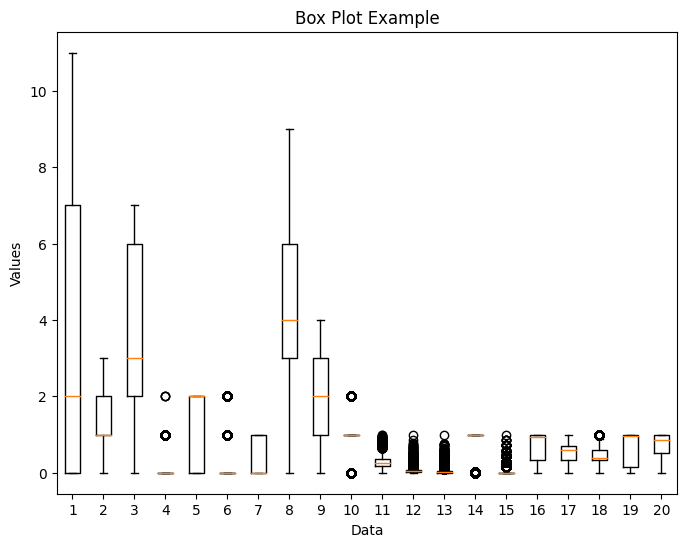

In [22]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(x_enco)

# Add labels and title
plt.xlabel("Data")
plt.ylabel("Values")
plt.title("Box Plot Example")

# Show the plot
plt.show()


In [23]:
import numpy as np
from scipy.stats.mstats import winsorize
from scipy import stats
import pandas as pd
from scipy.stats import mstats



In [24]:
def count_outliers_per_column(x_enco):
    # Calculate Q1, Q3, and IQR for each column
    q1 = np.percentile(x_enco, 25, axis=0)
    q3 = np.percentile(x_enco, 75, axis=0)
    iqr = q3 - q1

    # Calculate lower and upper whiskers
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # Count outliers for each column
    num_outliers_per_column = np.sum((x_enco < lower_whisker) | (x_enco > upper_whisker), axis=0)

    return num_outliers_per_column

outliers_per_column = count_outliers_per_column(x_enco)
print(outliers_per_column)

job                  0
marital              0
education            0
default           8600
housing              0
loan              7238
contact              0
month                0
day_of_week          0
poutcome          5625
age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


In [25]:
lower_percentile = 10
upper_percentile = 20
x_enco = pd.DataFrame(mstats.winsorize(x_enco.values, limits=(lower_percentile / 100, upper_percentile / 100)), columns=x_enco.columns)
x_enco


job  marital  education  default  housing  loan  contact  month  \
0      1.0      1.0        0.0      0.0      0.0   0.0      1.0    1.0   
1      1.0      1.0        1.0      1.0      0.0   0.0      1.0    1.0   
2      1.0      1.0        1.0      0.0      1.0   0.0      1.0    1.0   
3      0.0      1.0        1.0      0.0      0.0   0.0      1.0    1.0   
4      1.0      1.0        1.0      0.0      0.0   1.0      1.0    1.0   
...    ...      ...        ...      ...      ...   ...      ...    ...   
41183  1.0      1.0        1.0      0.0      1.0   0.0      0.0    1.0   
41184  1.0      1.0        1.0      0.0      0.0   0.0      0.0    1.0   
41185  1.0      1.0        1.0      0.0      1.0   0.0      0.0    1.0   
41186  1.0      1.0        1.0      0.0      0.0   0.0      0.0    1.0   
41187  1.0      1.0        1.0      0.0      1.0   0.0      0.0    1.0   

       day_of_week  poutcome       age  duration  campaign  pdays  previous  \
0              1.0       1.0  0.481481  0.053070  0.000000    1.0  0.000000   
1              1.0       1.0  0.493827  0.030297  0.000000    1.0  0.000000   
2              1.0       1.0  0.246914  0.045954  0.000000    1.0  0.000000   
3              1.0       1.0  0.283951  0.030704  0.000000    1.0  0.000000   
4              1.0       1.0  0.481481  0.062424  0.000000    1.0  0.000000   
...            ...       ...       ...       ...       ...    ...       ...   
41183          0.0       1.0  0.691358  0.067914  0.000000    1.0  0.000000   
41184          0.0       1.0  0.358025  0.077877  0.000000    1.0  0.000000   
41185          0.0       1.0  0.481481  0.038430  0.018182    1.0  0.000000   
41186          0.0       1.0  0.333333  0.089874  0.000000    1.0  0.000000   
41187          0.0       0.0  0.703704  0.048597  0.036364    1.0  0.142857   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          0.937500        0.698753        0.60251   0.957379     0.859735  
1          0.937500        0.698753        0.60251   0.957379     0.859735  
2          0.937500        0.698753        0.60251   0.957379     0.859735  
3          0.937500        0.698753        0.60251   0.957379     0.859735  
4          0.937500        0.698753        0.60251   0.957379     0.859735  
...             ...             ...            ...        ...          ...  
41183      0.479167        1.000000        0.00000   0.089322     0.000000  
41184      0.479167        1.000000        0.00000   0.089322     0.000000  
41185      0.479167        1.000000        0.00000   0.089322     0.000000  
41186      0.479167        1.000000        0.00000   0.089322     0.000000  
41187      0.479167        1.000000        0.00000   0.089322     0.000000  

[41188 rows x 20 columns]

In [26]:
x_enco.isnull().sum()

job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
poutcome          0
age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [27]:
x_enco.duplicated().value_counts()

False    41143
True        45
dtype: int64

Encoding the target feature to binary

In [28]:
x_enc = x_enco
x_enc.shape


(41188, 20)

In [29]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)
y_enc.columns = y.name

In [30]:
y_enc

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Length: 41188, dtype: int64

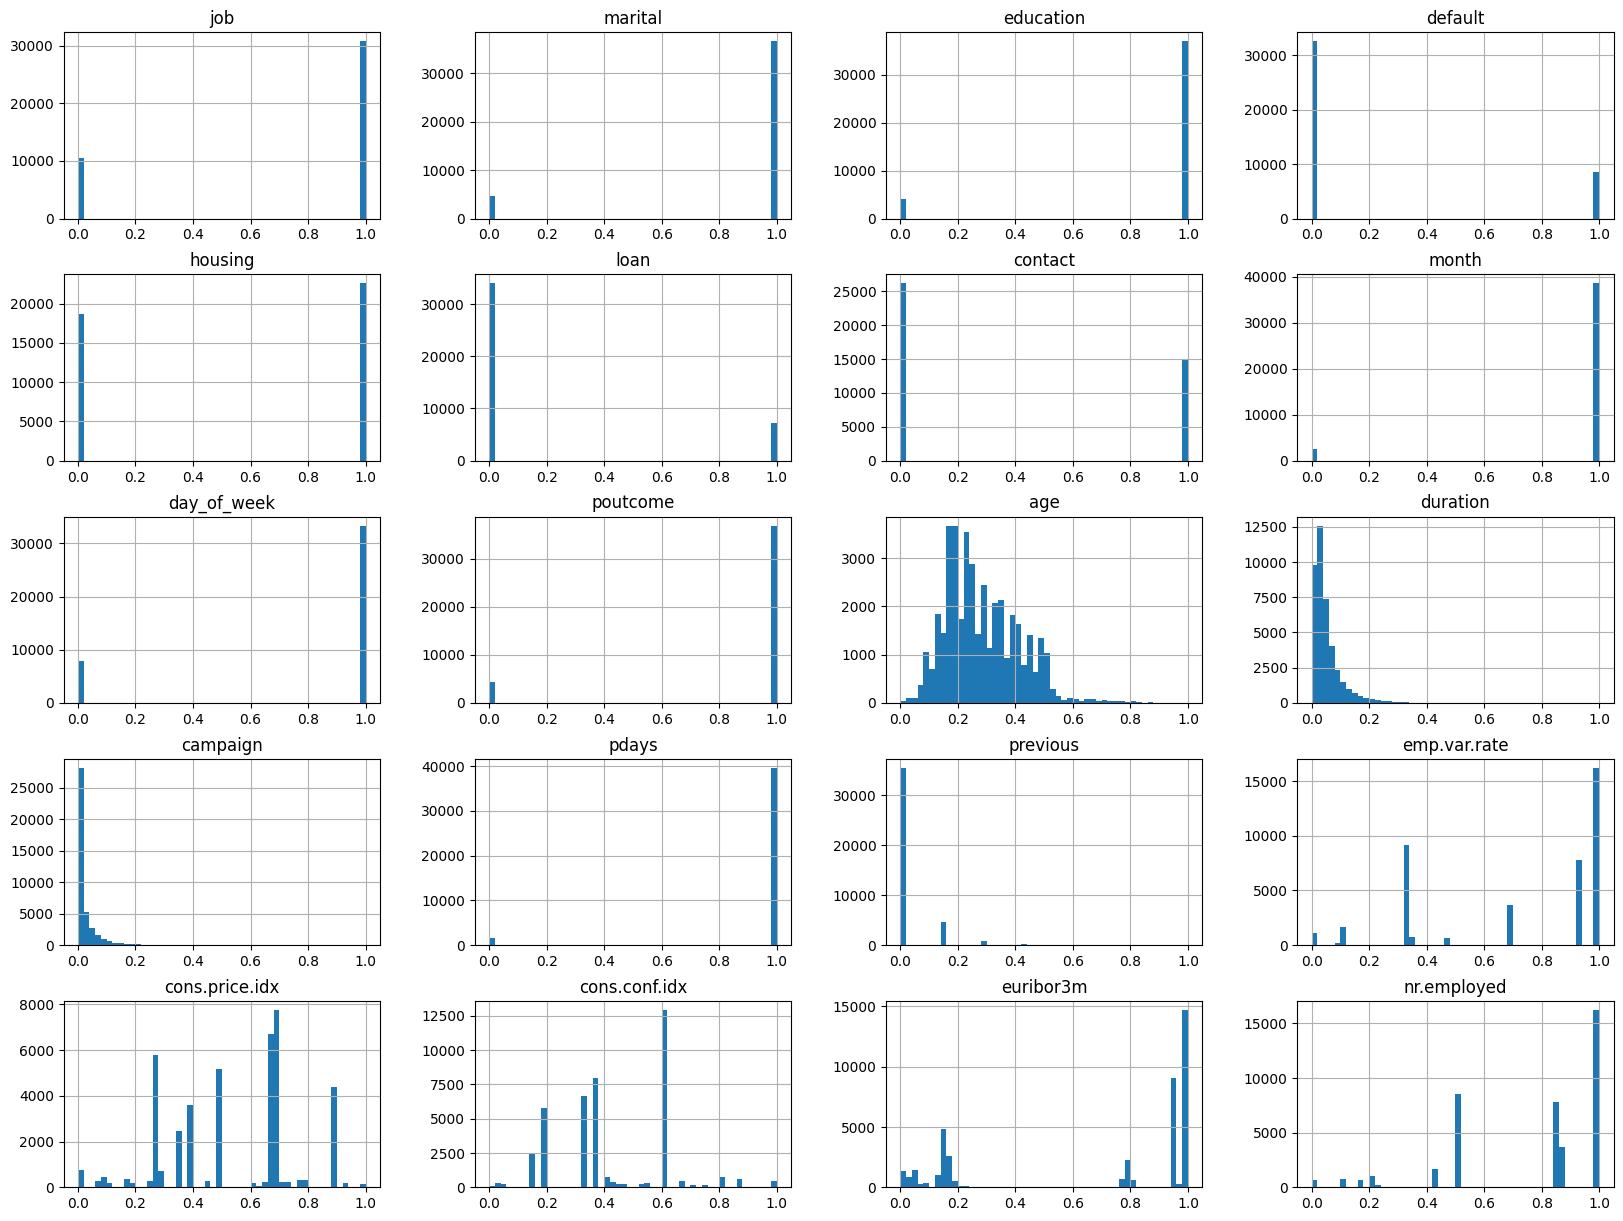

In [31]:
x_enc.hist(bins=50, figsize=(20,15))
plt.show()

Feature Selection
Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.
selecting the top k most relevant features (largest values) via the SelectKBest class.
define the SelectKBest class to use the chi2() function and select all (or most significant) features, then transform the train and test sets.


In [32]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_cat_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [33]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs       Score
6         loan  547.958309
3    education  321.922903
2      marital  167.607283
9  day_of_week   98.231174
0          age   90.175533
1          job   27.795598
8        month   10.231445
4      default    4.978734
7      contact    1.927284
5      housing    1.587004


Using Mutual Information Statistic for feature selection

In [34]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs     Score
11        campaign  0.078479
18       euribor3m  0.074058
17   cons.conf.idx  0.068544
16  cons.price.idx  0.068103
19     nr.employed  0.064189
15    emp.var.rate  0.055909
13        previous  0.040267
14        poutcome  0.018565
6             loan  0.015851
7          contact  0.014221


Feature Importance
using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [35]:
model = ExtraTreesClassifier()
model.fit(x_enc,y_enc)

ExtraTreesClassifier()

In [36]:
print(model.feature_importances_)

[0.01924241 0.01251624 0.01017194 0.0099944  0.02338188 0.01842359
 0.01412602 0.00426564 0.01515436 0.00942621 0.13149383 0.32302336
 0.07324467 0.06405564 0.01412822 0.02904635 0.02094608 0.02893905
 0.12775441 0.05066573]


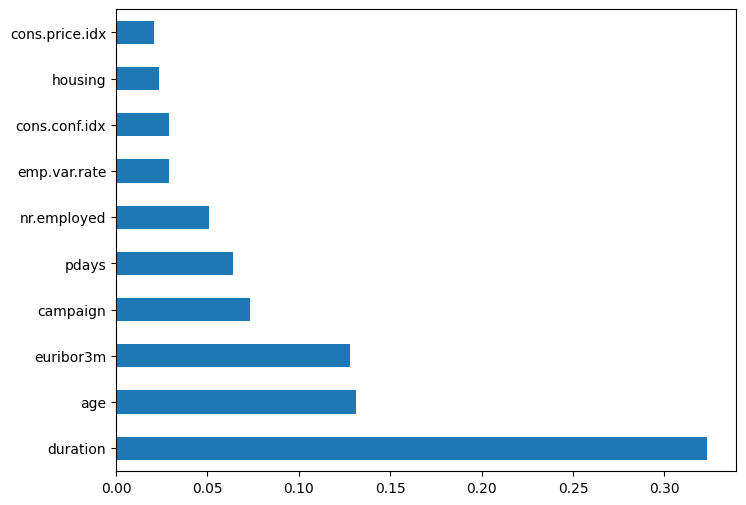

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

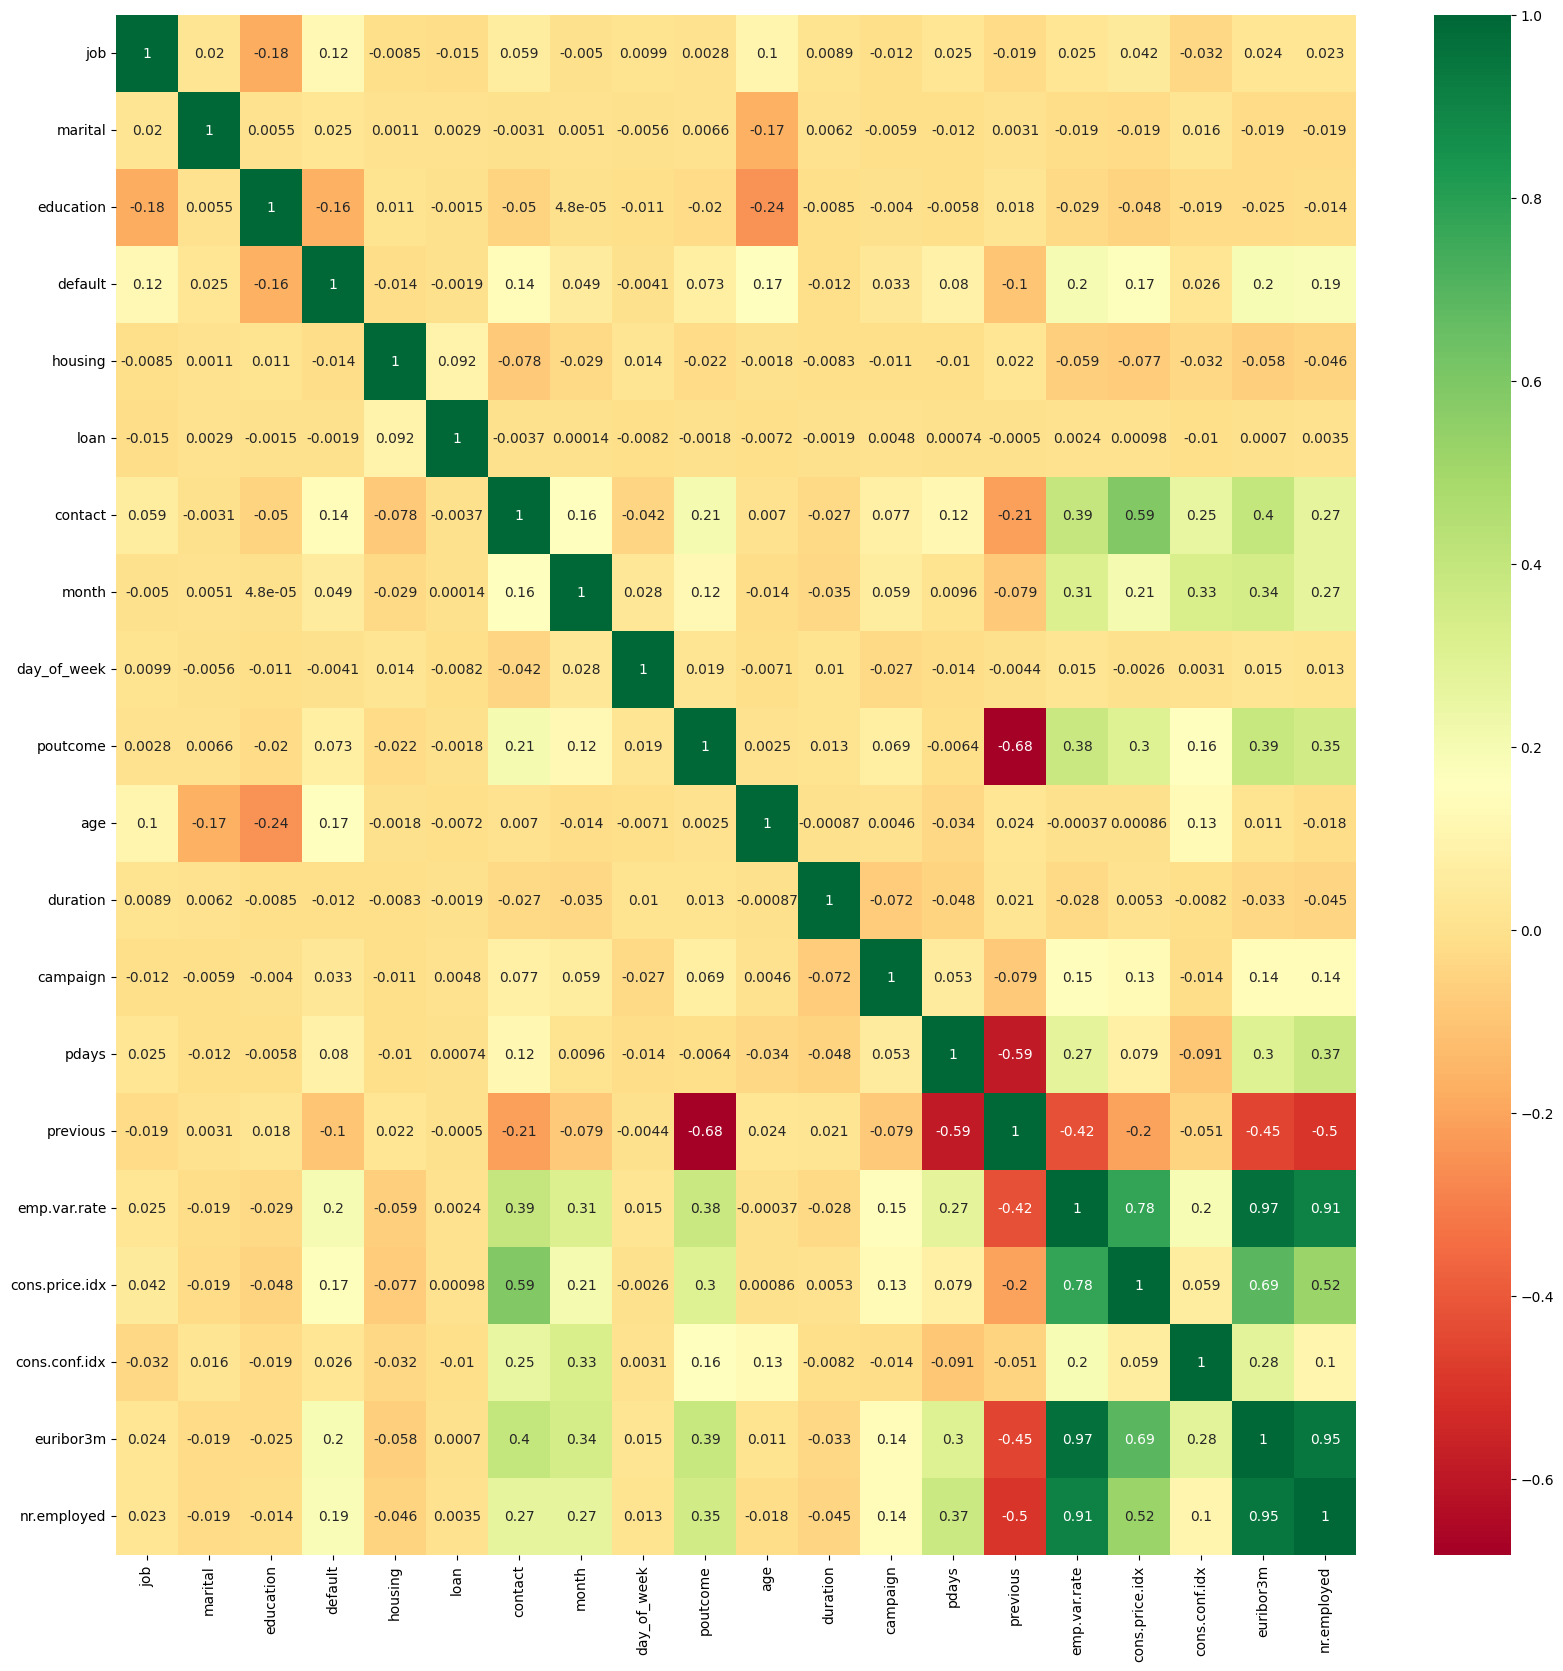

In [ ]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [38]:
col = x_enc.columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [39]:
x_enc = x_enc[col]

Split the data to train and test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.2, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (32950, 20)
X_test: (8238, 20)
y_train: (32950,)
y_test: (8238,)


In [41]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [42]:
y_res.value_counts()

0    29254
1    29254
dtype: int64

Using the Exact Tree Classifier

In [43]:
model = ExtraTreesClassifier()
model.fit(X_res, y_res)

ExtraTreesClassifier()

In [44]:
yhat = model.predict(X_test)
print(yhat)

[0 0 0 ... 0 0 1]


In [45]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 89.73


Logistic regression model

In [63]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_res, y_res)
yhat = LR.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.65


Decision Tree model

In [47]:
model = DecisionTreeClassifier()
model.fit(X_res, y_res)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 87.63


In [48]:
print("Features impotance:", model.feature_importances_)

Features impotance: [0.00752527 0.00438979 0.00403929 0.00791112 0.00858752 0.00505723
 0.00522264 0.0015439  0.00519679 0.00375546 0.05714288 0.47893318
 0.05722784 0.00894172 0.0068909  0.01176547 0.01127784 0.07108988
 0.08021975 0.16328154]


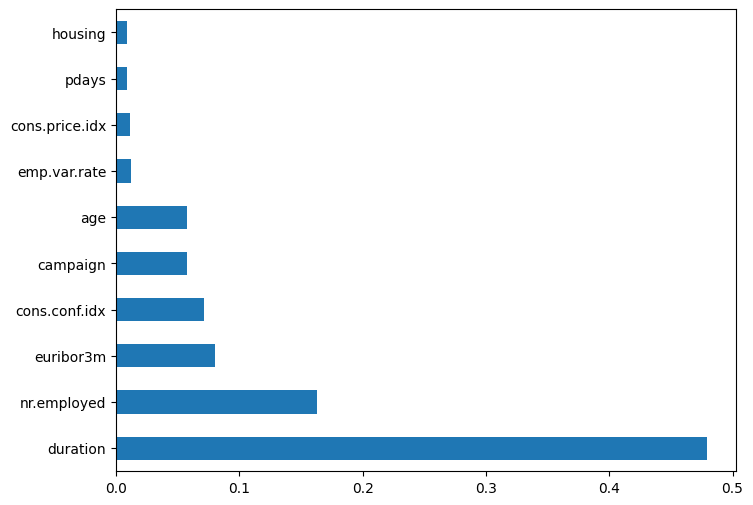

In [49]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Choose the 10 best features

In [50]:
feat_importances.nlargest(10)

duration          0.478933
nr.employed       0.163282
euribor3m         0.080220
cons.conf.idx     0.071090
campaign          0.057228
age               0.057143
emp.var.rate      0.011765
cons.price.idx    0.011278
pdays             0.008942
housing           0.008588
dtype: float64

In [51]:
col = feat_importances.nlargest(10).index
col

Index(['duration', 'nr.employed', 'euribor3m', 'cons.conf.idx', 'campaign',
       'age', 'emp.var.rate', 'cons.price.idx', 'pdays', 'housing'],
      dtype='object')

Refit the model

In [52]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]
model.fit(X_train_dt, y_train)
yhat = model.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.83


[Text(0.39249173057295594, 0.9833333333333333, 'x[1] <= 0.469\ngini = 0.199\nsamples = 27595\nvalue = [24499, 3096]'),
 Text(0.1187857029081915, 0.95, 'x[0] <= 0.032\ngini = 0.493\nsamples = 3326\nvalue = [1858, 1468]'),
 Text(0.040318360095606284, 0.9166666666666666, 'x[7] <= 0.007\ngini = 0.259\nsamples = 1175\nvalue = [995, 180]'),
 Text(0.014966553842698791, 0.8833333333333333, 'x[5] <= 0.045\ngini = 0.482\nsamples = 158\nvalue = [94, 64]'),
 Text(0.014453231524406873, 0.85, 'x[0] <= 0.026\ngini = 0.493\nsamples = 145\nvalue = [81, 64]'),
 Text(0.008116909157990985, 0.8166666666666667, 'x[7] <= 0.004\ngini = 0.447\nsamples = 89\nvalue = [59, 30]'),
 Text(0.00314409919953801, 0.7833333333333333, 'x[0] <= 0.017\ngini = 0.498\nsamples = 49\nvalue = [26, 23]'),
 Text(0.00102664463658384, 0.75, 'x[2] <= 0.018\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.00051332231829192, 0.7166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0015399669548757599, 0.7166666666

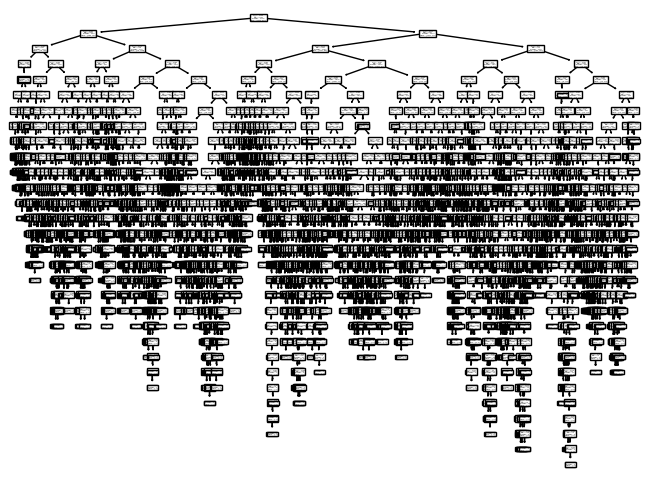

In [ ]:
tree.plot_tree(model)

In [ ]:
from sklearn.tree import export_text

In [ ]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.47
|   |--- feature_0 <= 0.03
|   |   |--- feature_7 <= 0.01
|   |   |   |--- feature_5 <= 0.05
|   |   |   |   |--- feature_0 <= 0.03
|   |   |   |   |   |--- feature_7 <= 0.00
|   |   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.18
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  0.18
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.02
|   |   |   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.00
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.00
|   |   |

In [ ]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

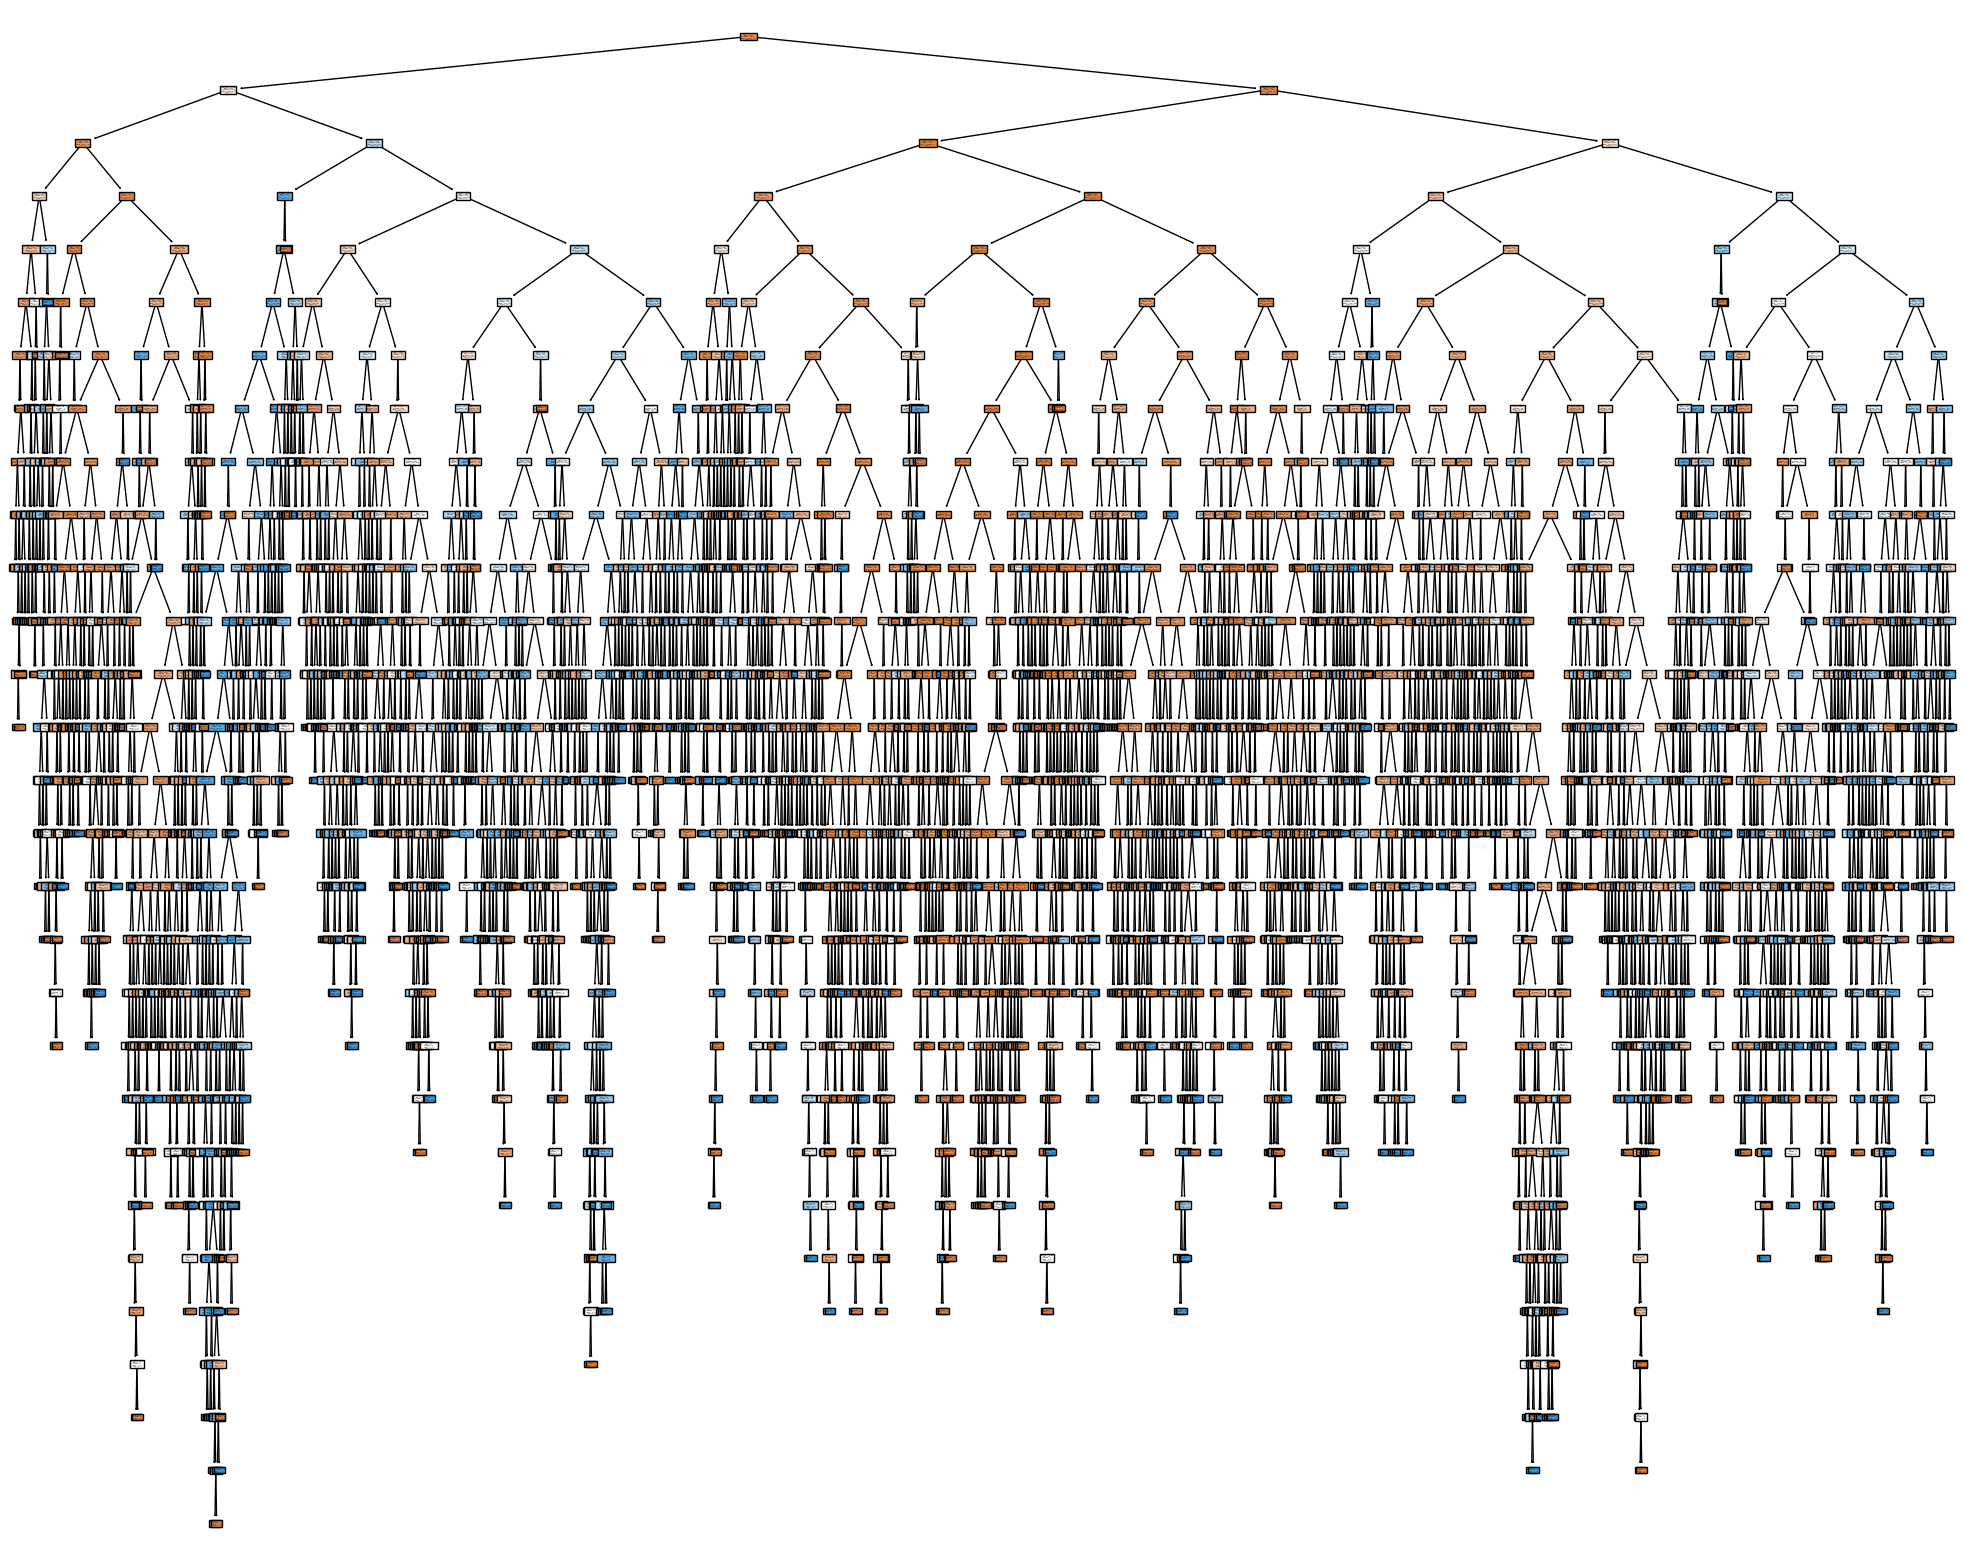

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
               feature_names = col,
               class_names = y.unique(),
               filled = True)

In [54]:
fig.savefig('decision_tree.png')

In [55]:
best = feat_importances.nlargest(3).index
best

Index(['duration', 'nr.employed', 'euribor3m'], dtype='object')

In [56]:
X_train_dt = X_train[best]
X_test_dt = X_test[best]
model.fit(X_train_dt, y_train)
yhat = model.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 89.35


[Text(0.4128692562141843, 0.9861111111111112, 'x[1] <= 0.469\ngini = 0.199\nsamples = 27595\nvalue = [24499, 3096]'),
 Text(0.12744272589901035, 0.9583333333333334, 'x[0] <= 0.032\ngini = 0.493\nsamples = 3326\nvalue = [1858, 1468]'),
 Text(0.040333301352621496, 0.9305555555555556, 'x[0] <= 0.025\ngini = 0.259\nsamples = 1175\nvalue = [995, 180]'),
 Text(0.0150568172578762, 0.9027777777777778, 'x[0] <= 0.016\ngini = 0.17\nsamples = 779\nvalue = [706, 73]'),
 Text(0.002081456499185305, 0.875, 'x[2] <= 0.018\ngini = 0.036\nsamples = 276\nvalue = [271, 5]'),
 Text(0.000832582599674122, 0.8472222222222222, 'x[0] <= 0.013\ngini = 0.145\nsamples = 38\nvalue = [35, 3]'),
 Text(0.000416291299837061, 0.8194444444444444, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.001248873899511183, 0.8194444444444444, 'x[0] <= 0.013\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.000832582599674122, 0.7916666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.001665165199348244, 0.79

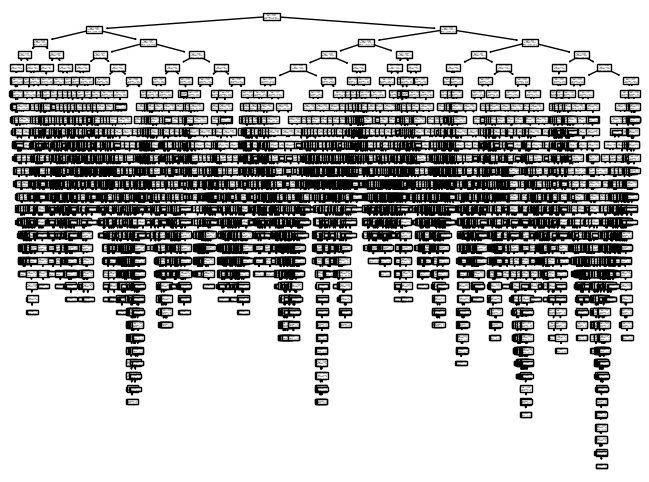

In [ ]:
tree.plot_tree(model)

In [ ]:
from sklearn.tree import export_text

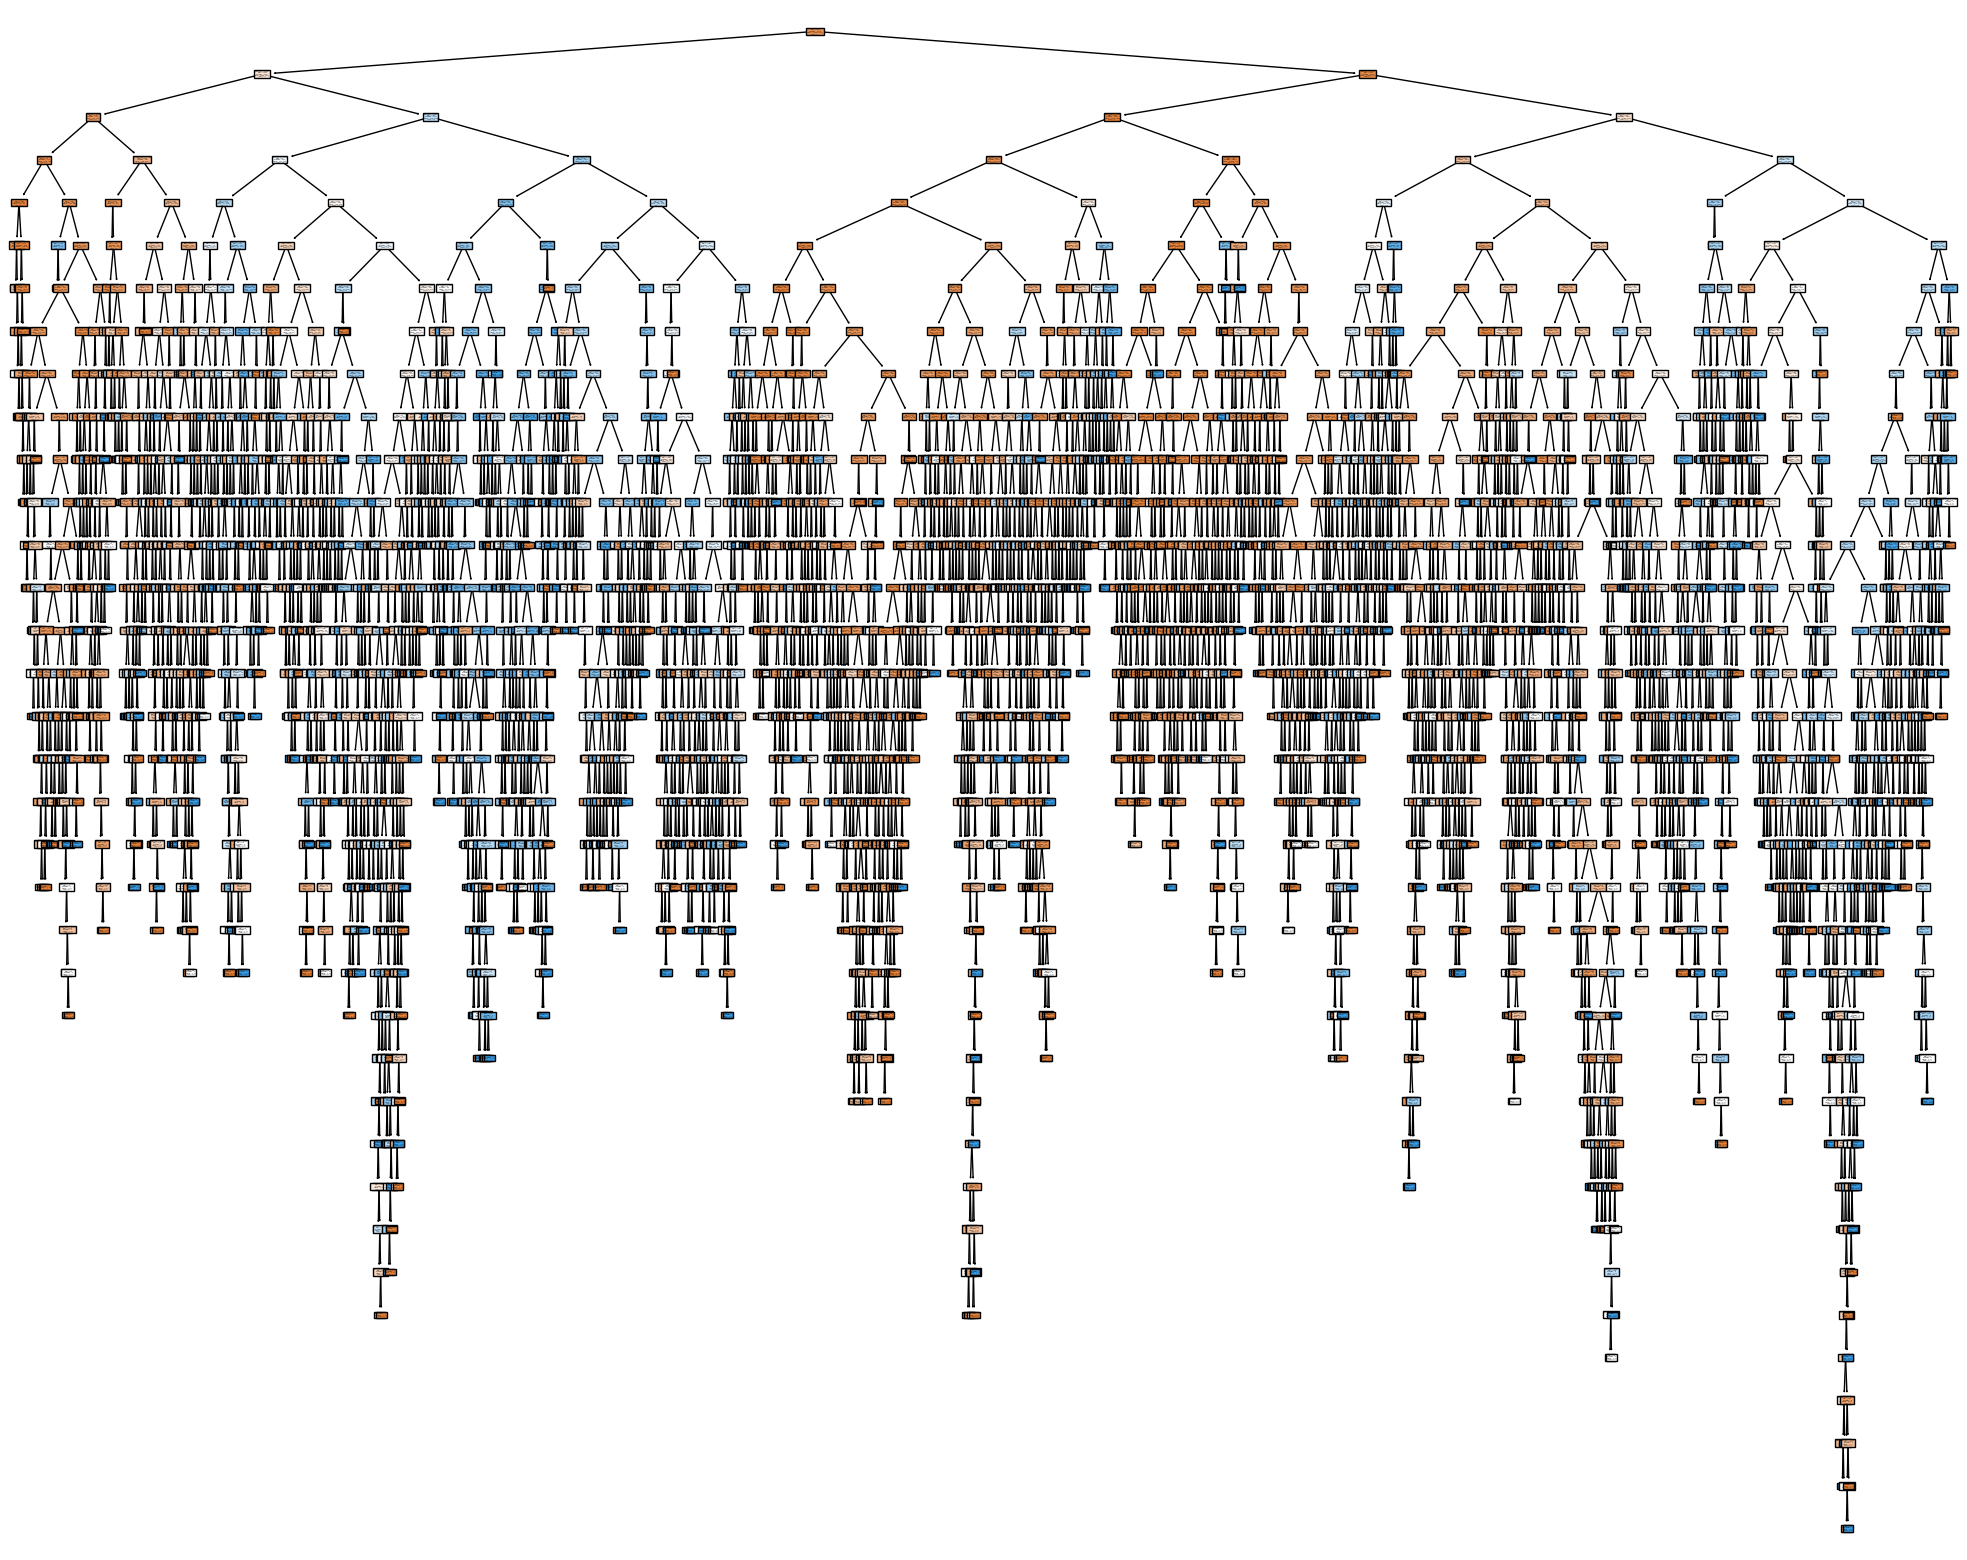

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
               feature_names = best,
               class_names = y.unique(),
               filled = True)

In [57]:
from sklearn.ensemble import BaggingClassifier

In [58]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=1),n_estimators=30)

In [59]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]

In [60]:
Bag.fit(X_train_dt,y_train)
yhat = Bag.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.21


In [61]:
X_train_dt = X_train[best]
X_test_dt = X_test[best]
Bag.fit(X_train_dt,y_train)
yhat = Bag.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.91


Refit logistic model with trimmed features



In [65]:
X_train_dt = X_train[best]
X_test_dt = X_test[best]

In [68]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train_dt,y_train)
yhat = LR.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.08


Tunning hyperparameter using grid search


In [69]:
param_grid={'C':[0.001,0.01,0.1],'penalty':["l1", "l2"]}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid = GridSearchCV(LogisticRegression(), cv=3, param_grid=param_grid,scoring="recall",n_jobs=-1)
print("Done")

Done


In [72]:

grid.fit(X_train_dt, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [73]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [74]:
grid.best_score_

0.11525974025974027

In [75]:
LR=grid.best_estimator_
LR

LogisticRegression(C=0.1)

In [76]:
yhat=LR.predict(X_test_dt)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7294
           1       0.68      0.17      0.27       944

    accuracy                           0.90      8238
   macro avg       0.79      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



In [80]:
pred_prob1 = LR.predict_proba(X_test_dt)
pred_prob2 = Bag.predict_proba(X_test_dt)

In [81]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8938276555376372 0.9272883040623126


In [84]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

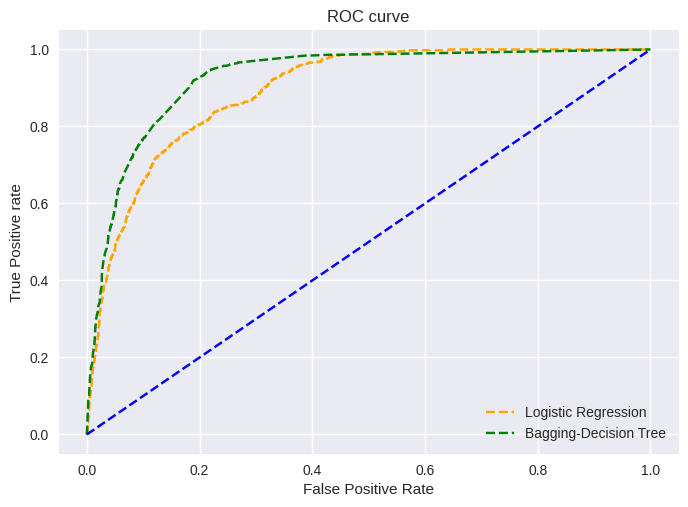

In [85]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Bagging-Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [87]:
yhat=Bag.predict(X_test_dt)

In [88]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7294
           1       0.62      0.55      0.58       944

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.90      0.91      0.91      8238

